# 4.9 - Intro to Data Visualization with Python Part 2

### Table of Contents

* [Importing data and libraries](#import_libraries)
* [Step 2](#step2)
    * [Bar Charts](#bar)
    * [Histograms](#histo)
    * [Scatterplots](#scatter)
    * [Retrying Histrogram after marking outliers as NaN](#histo2)
    * [Line Charts and Sampling Data](#line)
* [Step 3](#step3)
* [Step 4](#step4)
* [Step 5](#step5)
* [Step 6](#step5)
* [Step 7](#step7)
* [Step 8](#step8)

## Importing data and libraries <a class="anchor" id="import_libraries"></a>

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Creating a shortcut of a folderpath for easy importing/exporting
path = r'/Users/kerimzengin/Desktop/Data Analytics/Data Analytics Immersion/Achievement 4 - Python Fundamentals for Data Analysts/Instacart Basket Analysis/'

In [4]:
#Creates a dataframe for the orders_products_merged_grouped pickle file
ords_prods_merge = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_merged_grouped.pkl'))

In [5]:
#Creates a dataframe for the orders_products_customers pickle file
ords_prods_cust = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_customers.pkl'))

# 2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart. <a class="anchor" id="step2"></a>

# Bar Charts <a class="anchor" id="bar"></a>

<AxesSubplot:>

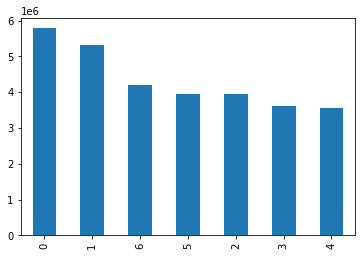

In [6]:
#Creating a bar chart showing the frequency count for the order_days_of week column
ords_prods_merge['order_days_of_week'].value_counts().plot.bar()

<AxesSubplot:>

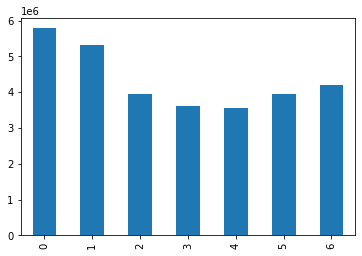

In [7]:
#Sorting the values of frequencies in numbered order
ords_prods_merge['order_days_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

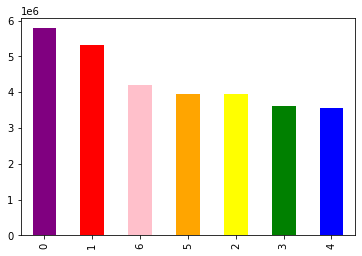

In [8]:
#Adding colours to the bar chart
ords_prods_merge['order_days_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

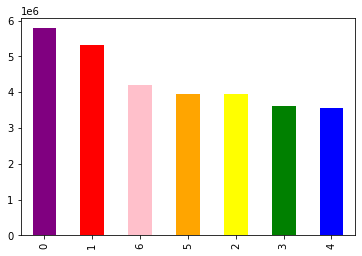

In [9]:
#Saving bar chart in the bar object
bar = ords_prods_merge['order_days_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

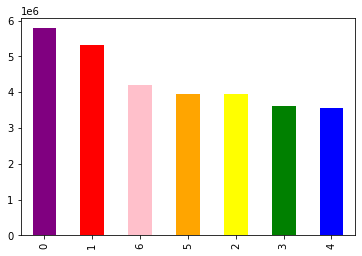

In [10]:
#Calling the bar chart for order_days_of_week frequencies
bar.figure

In [11]:
#Exporting the bar chart to the Visualisations folder
bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualisations', 'bar_orders_dow.png'))

# Histograms <a class="anchor" id="histo"></a>

<AxesSubplot:ylabel='Frequency'>

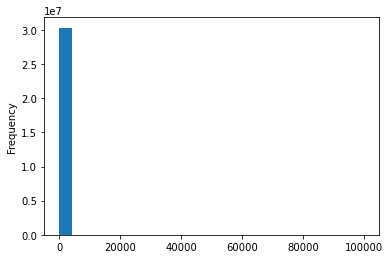

In [12]:
#Creating a histogram for prices with bins set at 25
ords_prods_merge['prices'].plot.hist(bins = 25)

# Scatterplots <a class="anchor" id="scatter"></a>

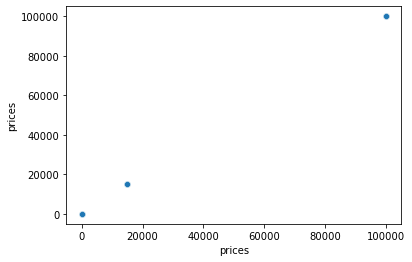

In [13]:
#Creating a scatterplot for the prices column
scat = sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

In [14]:
#Finding records with prices more than 100
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,eval_set,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,busiest_day,busiest_days,slowest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_orders,spending_habit,median_days_prior_order,order_frequency
1413,912404,17,prior,12,2,14,5.0,21553,5,0,...,Regularly busy,Regularly busy,Regularly busy,Average Orders,40,Regular customer,109.670103,High spender,5.0,Frequent spender
1475,603376,17,prior,22,6,16,4.0,21553,3,1,...,Regularly busy,Regularly busy,Regularly busy,Average Orders,40,Regular customer,109.670103,High spender,5.0,Frequent spender
15314,3264360,135,prior,2,2,21,13.0,21553,6,0,...,Regularly busy,Regularly busy,Regularly busy,Average Orders,4,New customer,1250.245833,High spender,12.0,Regular spender
15320,892534,135,prior,3,0,8,12.0,21553,3,1,...,Busiest day,Busiest day,Busiest day,Average Orders,4,New customer,1250.245833,High spender,12.0,Regular spender
50309,229704,342,prior,8,1,19,30.0,21553,9,0,...,Regularly busy,Regularly busy,Regularly busy,Average Orders,16,Regular customer,120.090909,High spender,23.0,Non-frequent spender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30279019,1039454,205650,prior,15,1,10,7.0,21553,6,1,...,Regularly busy,Regularly busy,Regularly busy,Most Orders,25,Regular customer,358.255457,High spender,6.0,Frequent spender
30279065,3172853,205650,prior,18,1,9,7.0,21553,17,1,...,Regularly busy,Regularly busy,Regularly busy,Average Orders,25,Regular customer,358.255457,High spender,6.0,Frequent spender
30304628,2504315,205818,prior,3,5,15,3.0,21553,13,0,...,Regularly busy,Regularly busy,Regularly busy,Average Orders,25,Regular customer,173.751955,High spender,12.5,Regular spender
30304638,1108388,205818,prior,5,4,5,1.0,21553,5,1,...,Least busy,Regularly busy,Regularly busy,Average Orders,25,Regular customer,173.751955,High spender,12.5,Regular spender


In [15]:
#Turning outliers into NaNs
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [16]:
#Returning the max value for the prices column
ords_prods_merge['prices'].max()

25.0

# Retrying Histrogram after marking outliers as NaN <a class="anchor" id="histo2"></a>

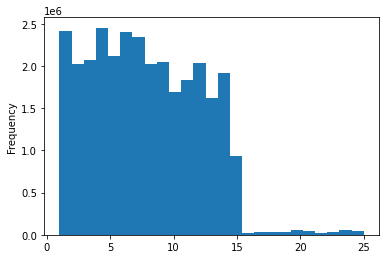

In [17]:
#Creating a histogram again for the prices column
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

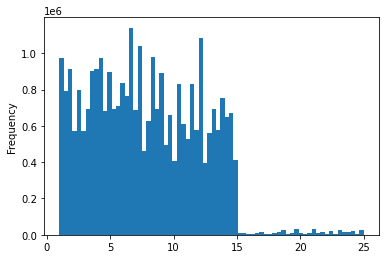

In [18]:
#Creating a second histogram for the prices column with an increased bins size
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [19]:
#Exporting first histogram to the Visualisations folder
hist.figure.savefig(os.path.join(path, 'Analysis', 'Visualisations', 'histo_prices.png'))

In [20]:
#Exporting second histogram to the Visualisations folder
hist_2.figure.savefig(os.path.join(path, 'Analysis', 'Visualisations', 'histo_2_prices.png'))

In [21]:
#Exporting scatterplot to the Visualisations folder
scat.figure.savefig(os.path.join(path, 'Analysis', 'Visualisations', 'scat_prices.png'))

# Line Charts and Sampling Data <a class="anchor" id="line"></a>

In [22]:
#Creating a subset of the dataframe with 2000000 rows
df = ords_prods_merge[:2000000]

In [23]:
#Creating a sample list for the 70/30 sample ratio
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [24]:
#Showing a output list of true/false for each value
dev

array([False,  True, False, ...,  True,  True,  True])

In [25]:
#Producting a list of 10 random numbers
np.random.rand(10)

array([0.44098217, 0.02004236, 0.84264035, 0.55728976, 0.86140439,
       0.32215325, 0.40074072, 0.71764654, 0.91611102, 0.01365572])

In [26]:
#Creating the 2 sample sets
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [27]:
#Store 70% of the sample in the big dataframe
big = ords_prods_merge[dev]

In [28]:
#Store 30% of the sample in the small dataframe
small = ords_prods_merge[~dev]

In [29]:
#Checking the size of the entire dataframe
len(ords_prods_merge)

30358034

In [30]:
#Checking the size of both sample dataframes if adds up to entire dataframe's number
len(big) + len(small)

30358034

In [31]:
#Creating a dataframe containing only order_days_of_week & prices column from the small sample set
df_2 = small[['order_days_of_week', 'prices']]

KeyboardInterrupt: 

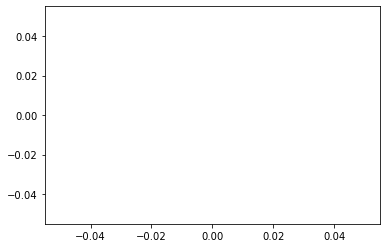

In [32]:
#Creating a line graph for the df_2 dataframe
#line = sns.lineplot(data = df_2, x = 'order_days_of_week', y = 'prices')

In [ ]:
#Creating a dataframe containing only order_days_of_week & prices column from the big sample set
#df_3 = big[['order_days_of_week', 'prices']]

In [ ]:
#Creating a line graph for the df_3 dataframe
#line_2 = sns.lineplot(data = df_3, x = 'order_days_of_week', y = 'prices')

# 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
## In a markdown cell beneath your histogram, describe what the histogram demonstrates. <a class="anchor" id="step3"></a>

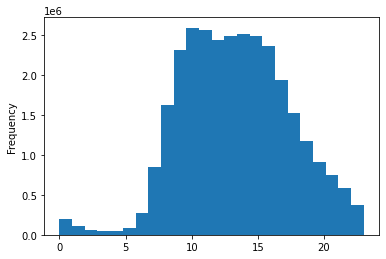

In [33]:
#Creating a histogram for the order_hour_of_day column
order_dow_hist = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

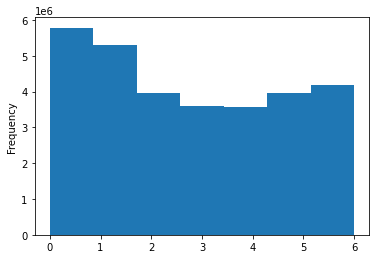

In [34]:
busiest_days = ords_prods_cust['order_days_of_week'].plot.hist(bins = 7)

#### The histogram shows the busiest time for orders are from 9 am until 16 pm before they start to decline

# 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column. <a class="anchor" id="step4"></a>

In [ ]:
#Creating a bar chart showing the distribution of loyal customers
loyalty_hist = ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

# 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!) <a class="anchor" id="step5"></a>

In [ ]:
#Creating a sample list holding true/false valus to test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [ ]:
#Stores 70 percent of sample in dataframe sample_70
sample_70 = ords_prods_cust[dev]

In [ ]:
#Stores 30 percent of sample in dataframe sample_30
sample_30 = ords_prods_cust[~dev]

In [ ]:
#checking the number of rows for the ords_prods_cust dataframe
len(ords_prods_cust)

In [ ]:
#checking the number of rows within both sample sets
len(sample_70) + len(sample_30)

In [ ]:
df_2 = sample_30[['prices', 'order_hour_of_day']]

In [ ]:
#Creating a lineplot with the 30% sample size
expeniture_line = price_hour_line = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

In [ ]:
#Creating a lineplot with the entire dataframe
#price_hour_line_2 = sns.lineplot(data = ords_prods_cust, x = 'order_hour_of_day', y = 'prices')

# 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:
## In a markdown cell beneath your line chart, describe what the line chart shows. <a class="anchor" id="step6"></a>

In [ ]:
#Checking for columsn within the dataframe
ords_prods_cust.columns

In [ ]:
#Creates a line chart showing the connection between age against number of dependants
age_dependants_line = sns.lineplot(data = ords_prods_cust, x = 'age', y = 'number_of_dependants')

#### The line graph shows no real clear significance between age and the number of dependants

In [ ]:
#Creates a line chart showing the connection between number of dependants against age
age_dependants_line2 = sns.lineplot(data = ords_prods_cust, x = 'number_of_dependants', y = 'age')

#### This line graph shows a better connection between age and number of dependants. The highest average age with no dependants is around 49.60, where the smallest average age with 1 dependants is at around 49.31

# 7. You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
## In a markdown cell beneath your scatterplot, describe what the scatterplot shows. <a class="anchor" id="step7"></a>

In [ ]:
#Creating a scatterplot showing the income against age
age_spending_scat = sns.scatterplot(x = 'age', y = 'income', data = ords_prods_cust)

#### The scatterplot shows as ages increases, the spending power increases.

# 8. Export your visualizations as “.png” files in your relevant project folder. <a class="anchor" id="step8"></a>

In [ ]:
#Exporting step 3's histogram to the Visualisations folder
order_dow_hist.figure.savefig(os.path.join(path, 'Analysis', 'Visualisations', 'hist_orders_dow.png'))

In [ ]:
#Exporting step 4's bar chart to the Visualisations folder
loyalty_hist.figure.savefig(os.path.join(path, 'Analysis', 'Visualisations', 'hist_loyalty.png'))

In [ ]:
#Exporting step 5's line chart to the Visualisations folder
expeniture_line.figure.savefig(os.path.join(path, 'Analysis', 'Visualisations', 'line_expenditure.png'))

In [ ]:
#Exporting step 6's first line chart to the Visualisations folder
age_dependants_line.figure.savefig(os.path.join(path, 'Analysis', 'Visualisations', 'age_dependants_line.png'))

In [ ]:
#Exporting step 6's second line chart to the Visualisations folder
age_dependants_line2.figure.savefig(os.path.join(path, 'Analysis', 'Visualisations', 'age_dependants_line2.png'))

In [ ]:
#Exporting step 7's scatterplot to the Visualisations folder
age_spending_scat.figure.savefig(os.path.join(path, 'Analysis', 'Visualisations', 'age_spending_scat.png'))